In [16]:
# https://realpython.com/python-keras-text-classification/

In [17]:
import pandas as pd

In [18]:
filepath_dict = {
    'yelp': 'yelp_labelled.txt',
    'amazon': 'amazon_cells_labelled.txt',
    'imdb': 'imdb_labelled.txt'
}

In [19]:
df_list = []

In [20]:
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)

In [21]:
df = pd.concat(df_list)

In [22]:
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [25]:
sentences = ['John likes ice cream', 'John hates chocolate.']

In [26]:
vectorizer.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [27]:
vectorizer.vocabulary_

{'John': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [28]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_yelp = df[df['source'] == 'yelp']

In [31]:
sentences = df_yelp['sentence'].values

In [32]:
y = df_yelp['label'].values

In [33]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000
)

In [34]:
vectorizer = CountVectorizer()

In [35]:
vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [36]:
X_train = vectorizer.transform(sentences_train)

In [37]:
X_test = vectorizer.transform(sentences_test)

In [38]:
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
classifier = LogisticRegression()

In [41]:
classifier.fit(X_train, y_train)

/home/user/.virtualenvs/solenie3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
score = classifier.score(X_test, y_test)

In [43]:
print('Accuracy:', score)

Accuracy: 0.796


In [44]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000
    )
    
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


In [45]:
from keras.models import Sequential

In [46]:
from keras import layers

In [47]:
input_dim = X_train.shape[1]

In [48]:
model = Sequential()

In [50]:
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))

In [51]:
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [55]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

In [56]:
print('Training accuracy: {:.4f}'.format(accuracy))

Training accuracy: 1.0000


In [57]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [58]:
print('Testing accuracy: {:.4f}'.format(accuracy))

Testing accuracy: 0.7754


In [59]:
import matplotlib.pyplot as plt

In [60]:
plt.style.use('ggplot')

In [61]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

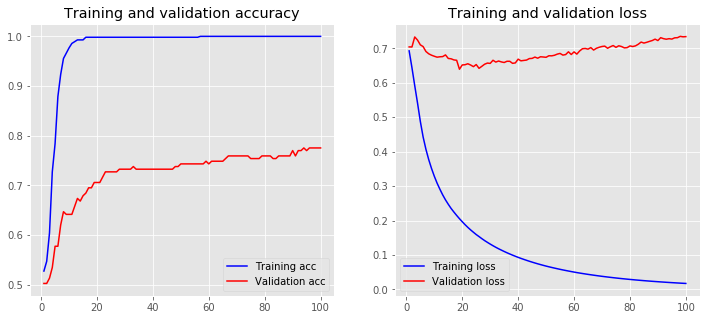

In [62]:
plot_history(history)

In [63]:
# representing words
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London']

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
encoder = LabelEncoder()

In [67]:
city_labels = encoder.fit_transform(cities)

In [68]:
city_labels

array([1, 0, 0, 2, 1])

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder = OneHotEncoder(sparse=False)

In [71]:
city_labels = city_labels.reshape((5, 1))

In [72]:
encoder.fit_transform(city_labels)

/home/user/.virtualenvs/solenie3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [73]:
from keras.preprocessing.text import Tokenizer

In [74]:
tokenizer = Tokenizer(num_words=5000)

In [75]:
tokenizer.fit_on_texts(sentences_train)

In [76]:
X_train = tokenizer.texts_to_sequences(sentences_train)

In [77]:
X_test = tokenizer.texts_to_sequences(sentences_test)

In [78]:
vocab_size = len(tokenizer.word_index) + 1

In [79]:
print(sentences_train[2])

I am a fan of his ... This movie sucked really bad.  


In [80]:
print(X_train[2])

[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [83]:
for word in ['the', 'all', 'movie']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 27
movie: 11


In [84]:
vocab_size

2575

In [85]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100

In [86]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)

In [87]:
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [88]:
print(X_train[0, :])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [89]:
from keras import layers

In [90]:
embedding_dim = 50

In [91]:
model = Sequential()

In [92]:
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))

In [93]:
model.add(layers.Flatten())

In [94]:
model.add(layers.Dense(10, activation='relu'))

In [95]:
model.add(layers.Dense(1, activation='sigmoid'))

In [96]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [99]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

In [100]:
print('Training accuracy: {:.4f}'.format(accuracy))

Training accuracy: 1.0000


In [101]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [102]:
print('Test accuracy: {:.4f}'.format(accuracy))

Test accuracy: 0.6898


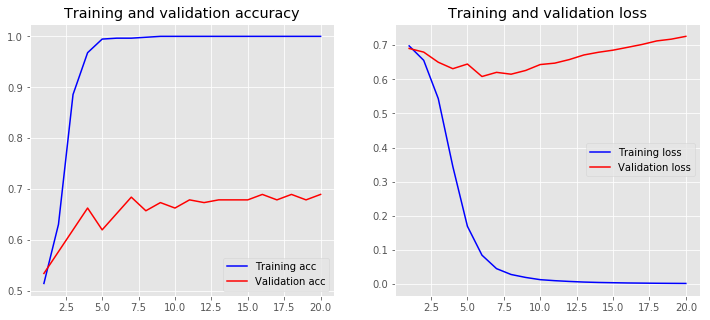

In [103]:
plot_history(history)

In [104]:
model = Sequential()

In [105]:
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))

In [106]:
model.add(layers.GlobalMaxPool1D())

In [107]:
model.add(layers.Dense(10, activation='relu'))

In [108]:
model.add(layers.Dense(1, activation='sigmoid'))

In [109]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Training accuracy: 1.0000
Testing accuracy:  0.7807


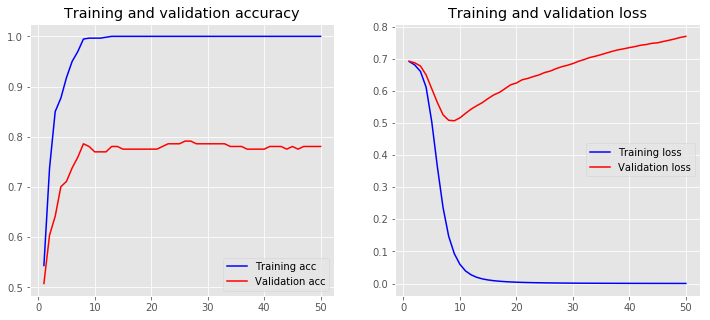

In [112]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [113]:
import numpy as np

In [114]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [115]:
embedding_dim = 50

In [119]:
import settings
filepath = settings.DATA_DIR / 'glove.6B.50d.txt'

In [120]:
embedding_matrix = create_embedding_matrix(
    filepath,
    tokenizer.word_index, embedding_dim
)

In [122]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))

In [124]:
nonzero_elements / vocab_size

0.9522330097087378

In [125]:
model = Sequential()

In [126]:
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=False))

In [127]:
model.add(layers.GlobalMaxPool1D())

In [128]:
model.add(layers.Dense(10, activation='relu'))

In [129]:
model.add(layers.Dense(1, activation='sigmoid'))

In [130]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 521
Non-trainable params: 128,750
_________________________________________________________________


In [132]:
history = model.fit(X_train, y_train,
                    epochs=50, verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [133]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

Training accuracy: 0.7772
Testing accuracy:  0.7647


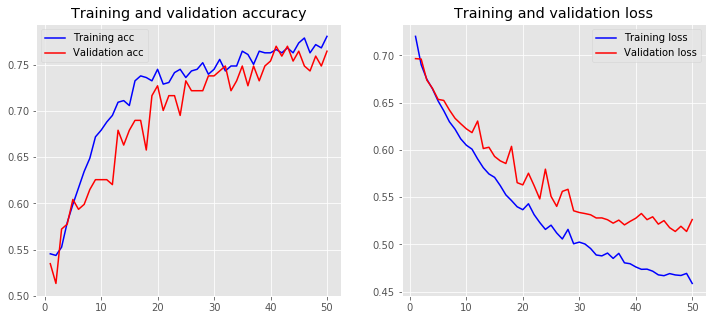

In [134]:
print('Training accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Testing accuracy:  {:.4f}'.format(accuracy))
plot_history(history)

In [135]:
model = Sequential()

In [136]:
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))

In [137]:
model.add(layers.GlobalMaxPool1D())

In [138]:
model.add(layers.Dense(10, activation='relu'))

In [139]:
model.add(layers.Dense(1, activation='sigmoid'))

In [140]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [141]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


In [142]:
history = model.fit(X_train, y_train,
                    epochs=50, verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Training accuracy: 1.0000
Testing accuracy:  0.7647


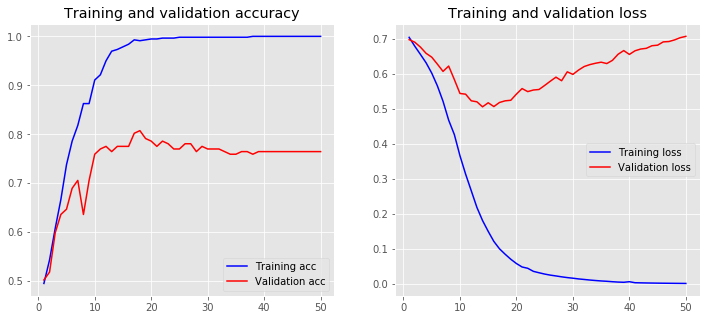

In [143]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Training accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Testing accuracy:  {:.4f}'.format(accuracy))
plot_history(history)

In [144]:
embedding_dim = 100

In [145]:
model = Sequential()

In [146]:
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))

In [147]:
model.add(layers.Conv1D(128, 5, activation='relu'))

In [148]:
model.add(layers.GlobalMaxPooling1D())